# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



**k-means clustering** meng-*cluster* data dengan cara mengikuti rata-rata jarak titik pusat. 

---
Pada langkah pertama, kita memilih *k* titik data sebagai langkah awal. Kita lalu mengelompokkan semua data ke titik awal terdekat. Lalu program akan menghitung titik pusat yang jaraknya adalah rata-rata dari jarak semua data dalam cluster tersebut. Program lalu akan membuat cluster baru dengan mengelompokkan semua data ke titik terdekat. Langkah-langkah ini akan diulang terus sampai tidak ada perubahan kelompok data lagi.

---
Untuk memastikan bahwa data sudah terbagi rata kedalam masing-masing kelompok, kita bisa menggunakan jumlah total *variance* dari semua cluster. Langkah-langkah diatas akan diulang sampai program menemukan total jumlah variance terkecil. Cluster hasil adalah cluster yang memiliki jumlah variance terkecil ini.

---
Untuk menentukan jumlah k yang akan dipakai, kita menggunakan metode elbow point, dimana dengan membagi **WCSS** atau *within-cluster sum of spaces* dengan jumlah cluster yang akan muncul.

---
WCSS sendiri didefinisikan sebagai total dari jarak antara masing-masing data dengan titik poin cluster yang dikuadratkan. Yang dikuadratkan adalah jarak-jaraknya, bukan totalnya.


Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('pelanggan_supermarket.csv')
umur = 'Umur'
skor = 'Skor Belanja (1-100)' #untuk menyingkat kode
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [4]:
#code here
#Check missing values
print("Info data:")
display(df.info())
print("Jumlah N/A:")
display(df.isna().sum())
print("Data types:")
display(df.dtypes)

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        245 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        246 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


None

Jumlah N/A:


ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

Data types:


ID_pelanggan                    int64
Jenis Kelamin                  object
Umur                          float64
Pendapatan pertahun (juta)      int64
Skor Belanja (1-100)          float64
dtype: object

In [5]:
#Handling missing value dengan menggunakan method ='ffill'
df_ffill = df.fillna(method='ffill')
df_ffill.isna().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

In [6]:
df_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        250 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        250 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


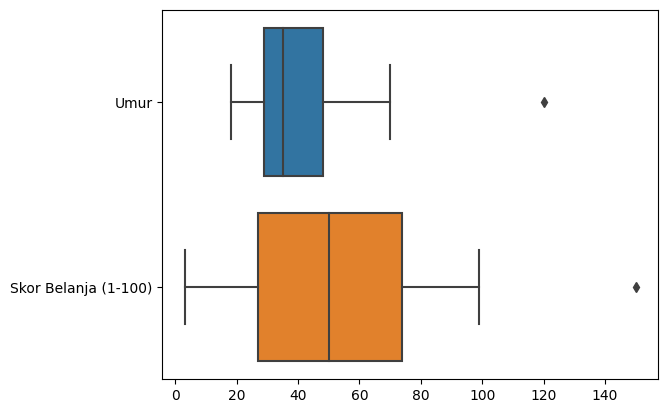

In [7]:
#Check outlier data

sns.boxplot(data=df_ffill[[umur,skor]],orient='h')
plt.show()

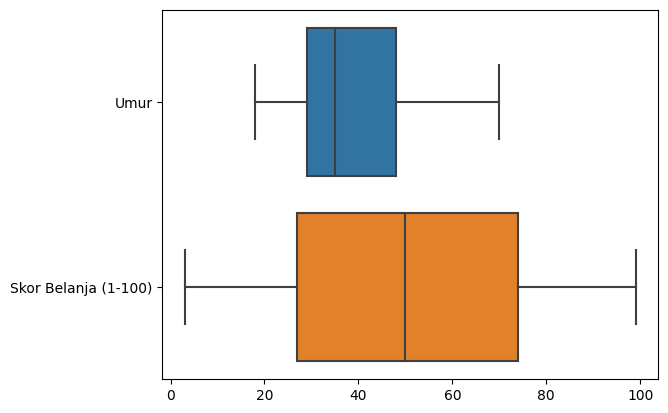

In [8]:
#Handling outlier menggunakan metode Interquartile range
data_outlier = df_ffill[[umur,skor]]

q1 = data_outlier.quantile(0.25)
q3 = data_outlier.quantile(0.75)
iqr = (q3-q1)*1.5

ub = q3+iqr
lb = q1-iqr

data = data_outlier[(df_ffill[umur]<ub[umur]) & (df_ffill[skor]<ub[skor])]

sns.boxplot(data=data,orient='h')
plt.show()

In [9]:
#Lakukan rescaling data menggunakan StandardScaler

x_array = np.array(data)
scale_data = StandardScaler().fit_transform(x_array)
df_scaled = pd.DataFrame(scale_data, columns=data.columns)
df_scaled

,Umur,Skor Belanja (1-100)
0,-1.455005,-0.396407
1,-1.304215,1.119369
2,-1.379610,-1.587373
3,-1.153425,0.975009
4,-0.550263,-0.360317
...,...,...
243,-0.851844,0.686290
244,1.560802,-1.298654
245,-0.248682,1.444178
246,-0.097892,-0.649036


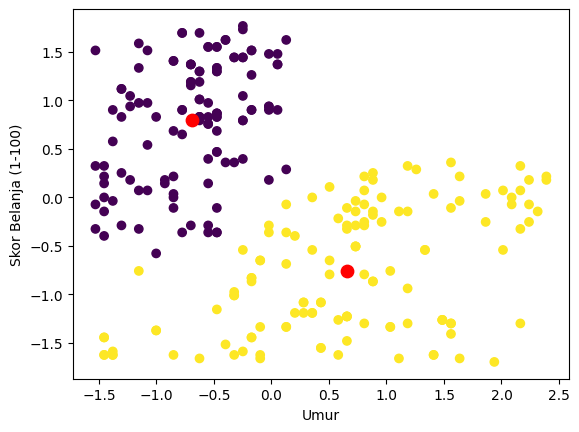

In [28]:
#Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan..
kmeans_label2 = KMeans(n_clusters=2, random_state=20, n_init=10).fit(df_scaled)
df_scaled['label2'] = kmeans_label2.labels_

plt.scatter(df_scaled.Umur,df_scaled[skor],c=df_scaled.label2)
plt.xlabel(umur)
plt.ylabel(skor)

centroids = kmeans_label2.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'red')

plt.show()

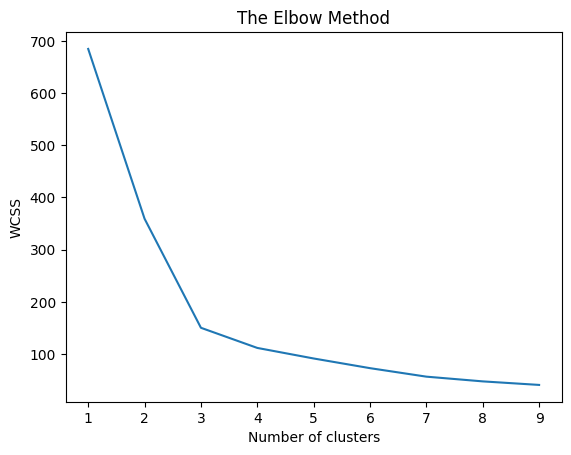

In [25]:
#Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
sum_of_squared_distances = []
K = range(1,10)
for k in K:
  km = KMeans(n_clusters=k, random_state=20, n_init=10).fit(df_scaled) #n_init to remove warnings
  sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

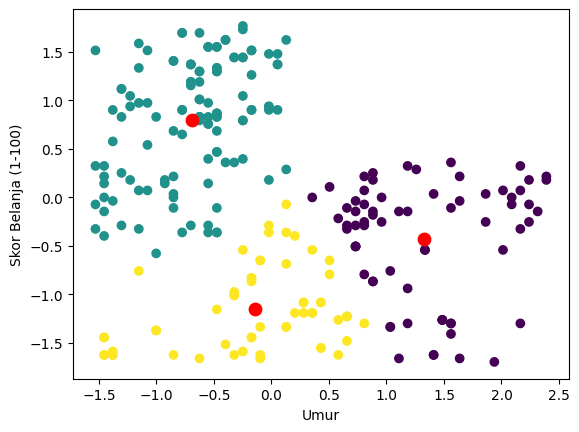

In [30]:
#Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
kmeans_label3 = KMeans(n_clusters=3, random_state=20, n_init=10).fit(df_scaled)
df_scaled['label3'] = kmeans_label3.labels_

plt.scatter(df_scaled.Umur,df_scaled[skor],c=df_scaled.label3)
plt.xlabel(umur)
plt.ylabel(skor)

centroids = kmeans_label3.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'red')

plt.show()

In [48]:
#Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut
k2 = silhouette_score(df_scaled,labels=df_scaled['label2'])
k3 = silhouette_score(df_scaled,labels=df_scaled['label3'])
k2b = silhouette_score(df_scaled[[umur,skor]],labels=df_scaled['label2'])
k3b = silhouette_score(df_scaled[[umur,skor]],labels=df_scaled['label3'])

print('version 1 dengan X = df_scaled')
print('Silhoutte Score untuk k = 2 adalah',k2)
print('Silhoutte Score untuk k = 3 adalah',k3)
print(' ')
print('version 2 dengan X = df_scaled[[umur,skor]]')
print('Silhoutte Score untuk k = 2 adalah',k2b)
print('Silhoutte Score untuk k = 3 adalah',k3b)

version 1 dengan X = df_scaled
Silhoutte Score untuk k = 2 adalah 0.47912086086221317
Silhoutte Score untuk k = 3 adalah 0.6184737289996193
 
version 2 dengan X = df_scaled[[umur,skor]]
Silhoutte Score untuk k = 2 adalah 0.4844287189633726
Silhoutte Score untuk k = 3 adalah 0.46590909508586453


Note to self: scores above is mean of the score of all the data points

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

Secara visual dari *Elbow method* bisa kita lihat bahwa k=3 adalah jumlah cluster ideal untuk data kita. 

Apabila kita perhatikan grafik clustering dengan 3 cluster, bisa kita simpulkan bahwa data terbagi menjadi tiga kelompok dengan fitur sebagai berikut: satu kelompok yang berumur muda dengan skor belanja tinggi, satu grup berumur muda dengan skor belanja rendah, dan satu grup berumur tua dengan skor belanja rendah.

Setelah beberapa percobaan, dapat juga disimpulkan bahwa versi 1 dari perhitungan silhouette score diatas tergantung pada *n_init* yang dimasukkan pada saat perhitungan cluster, sementara versi 2 tidak tergantung. Akan tetapi menurut sihluette score versi 2, jumlah k optimal adalah k=2 karena score nya lebih tinggi. Untuk mengerti lebih lanjut mengenai kenapa jumlah k optimal berbeda, dibutuhkan studi lebih lanjut.

## Kode dibawah saya copy-paste karena penasaran

src: 	[Selecting the number of clusters with silhouette analysis on KMeans clustering — scikit-learn 1.2.2 documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [32]:
range_n_clusters = [2, 3, 4, 5, 6]
X = df_scaled[[umur,skor]]
X

,Umur,Skor Belanja (1-100)
0,-1.455005,-0.396407
1,-1.304215,1.119369
2,-1.379610,-1.587373
3,-1.153425,0.975009
4,-0.550263,-0.360317
...,...,...
243,-0.851844,0.686290
244,1.560802,-1.298654
245,-0.248682,1.444178
246,-0.097892,-0.649036


For n_clusters = 2 The average silhouette_score is : 0.48555152598842644
For n_clusters = 3 The average silhouette_score is : 0.4658669848365053
For n_clusters = 4 The average silhouette_score is : 0.4388259372830444
For n_clusters = 5 The average silhouette_score is : 0.3355927000165135
For n_clusters = 6 The average silhouette_score is : 0.4501528040760347


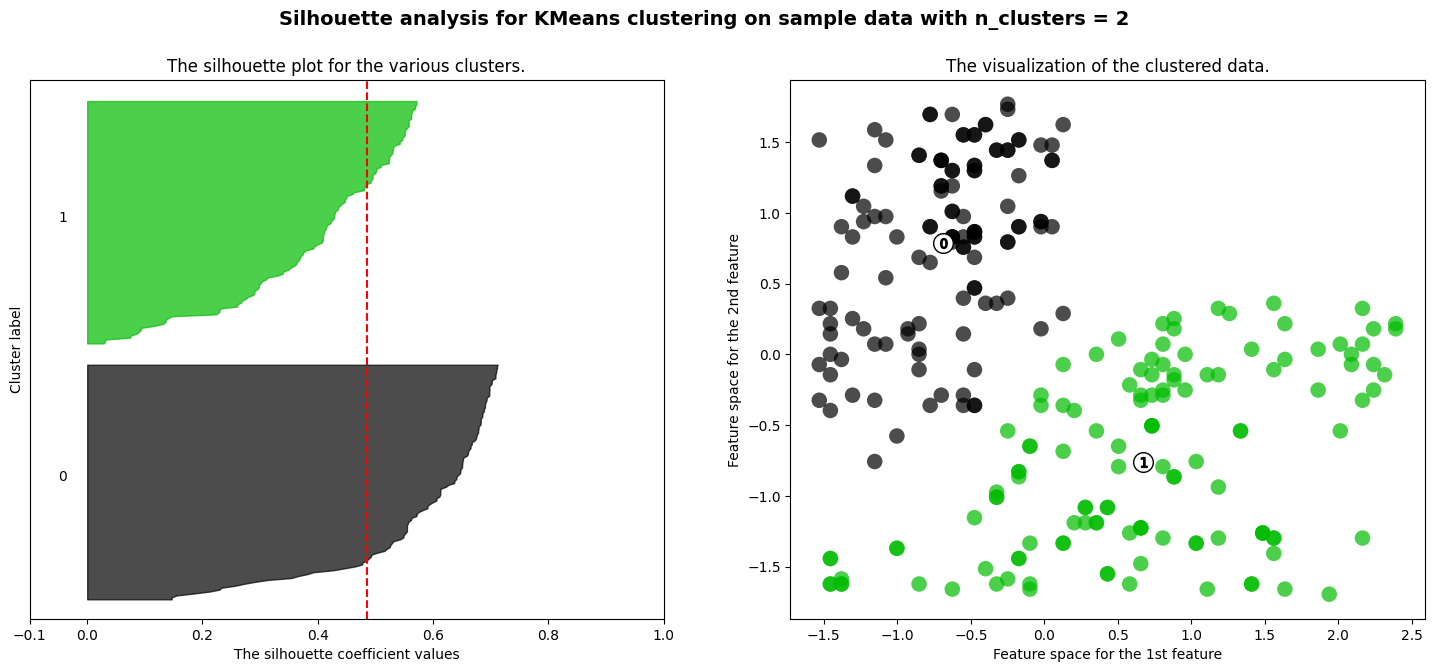

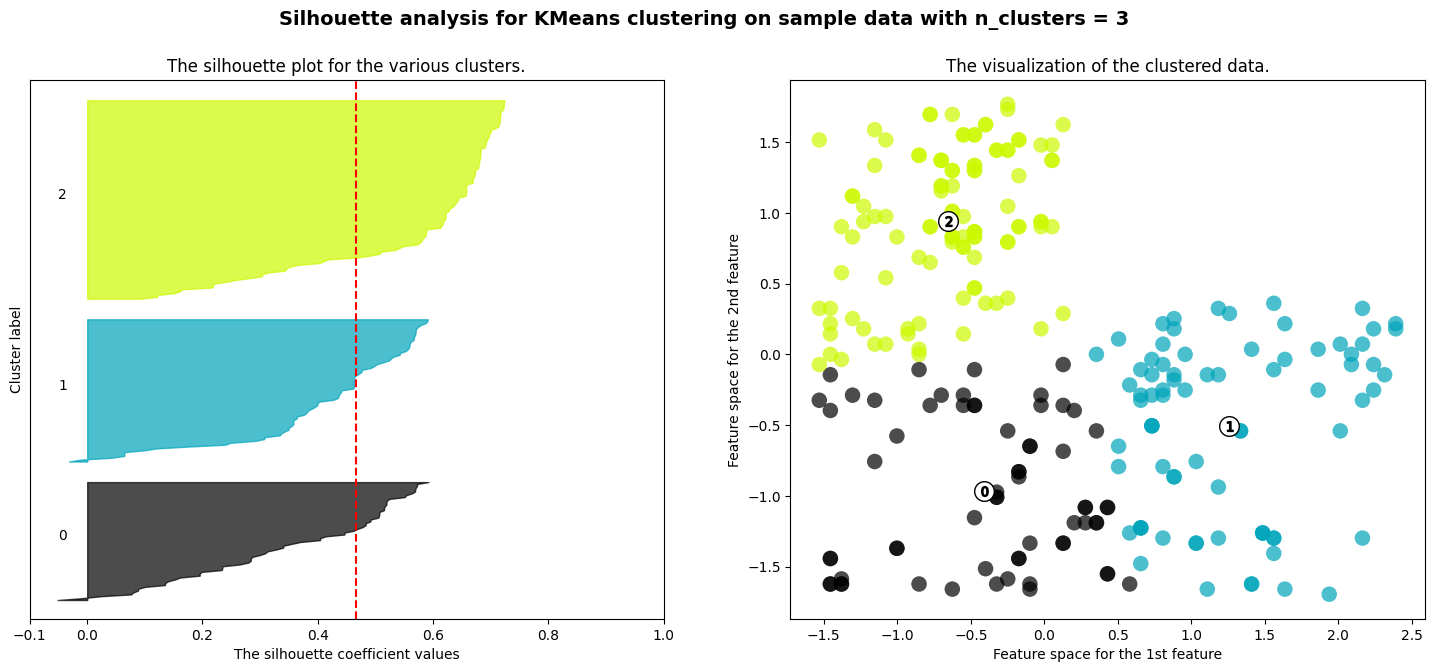

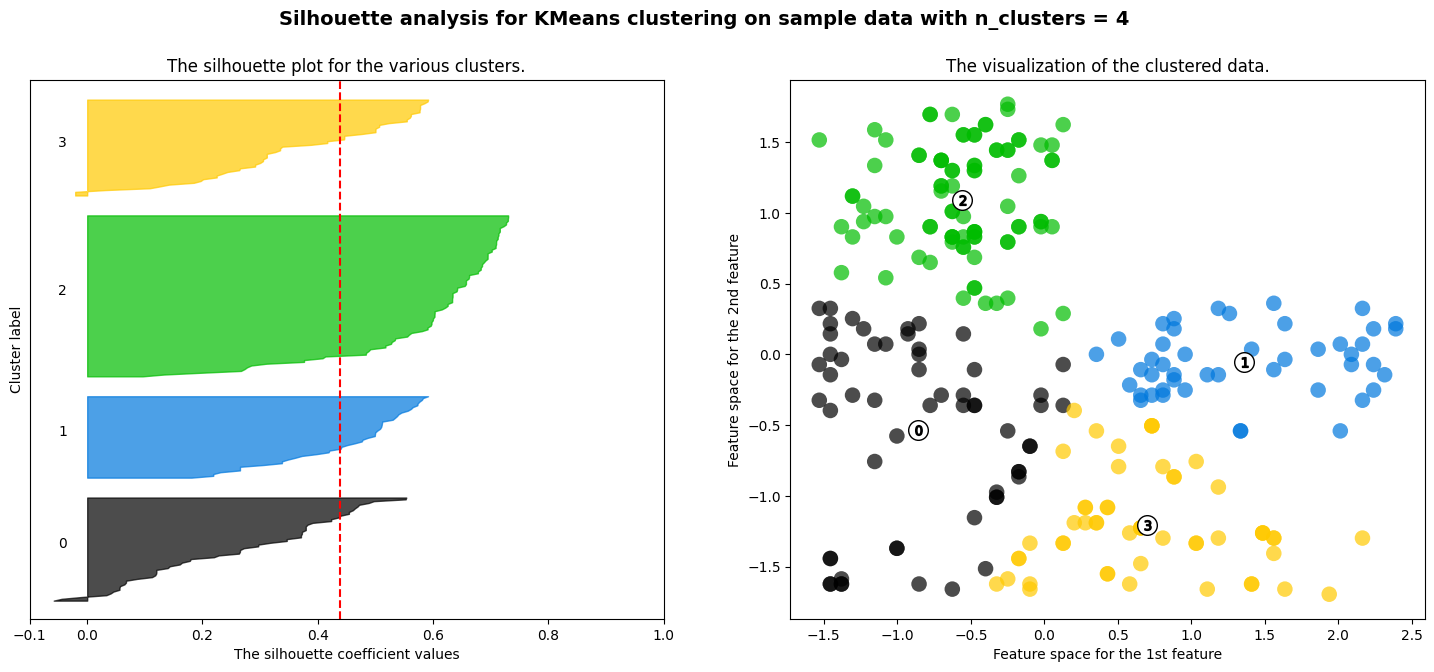

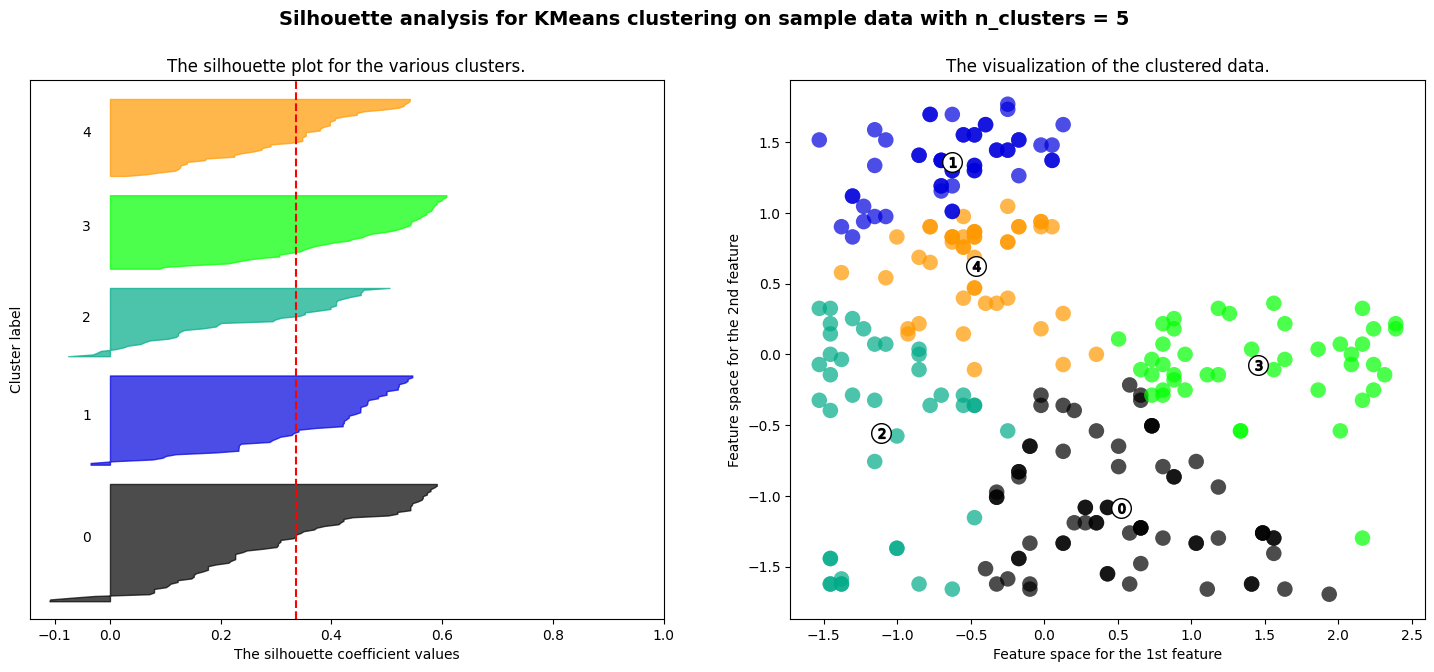

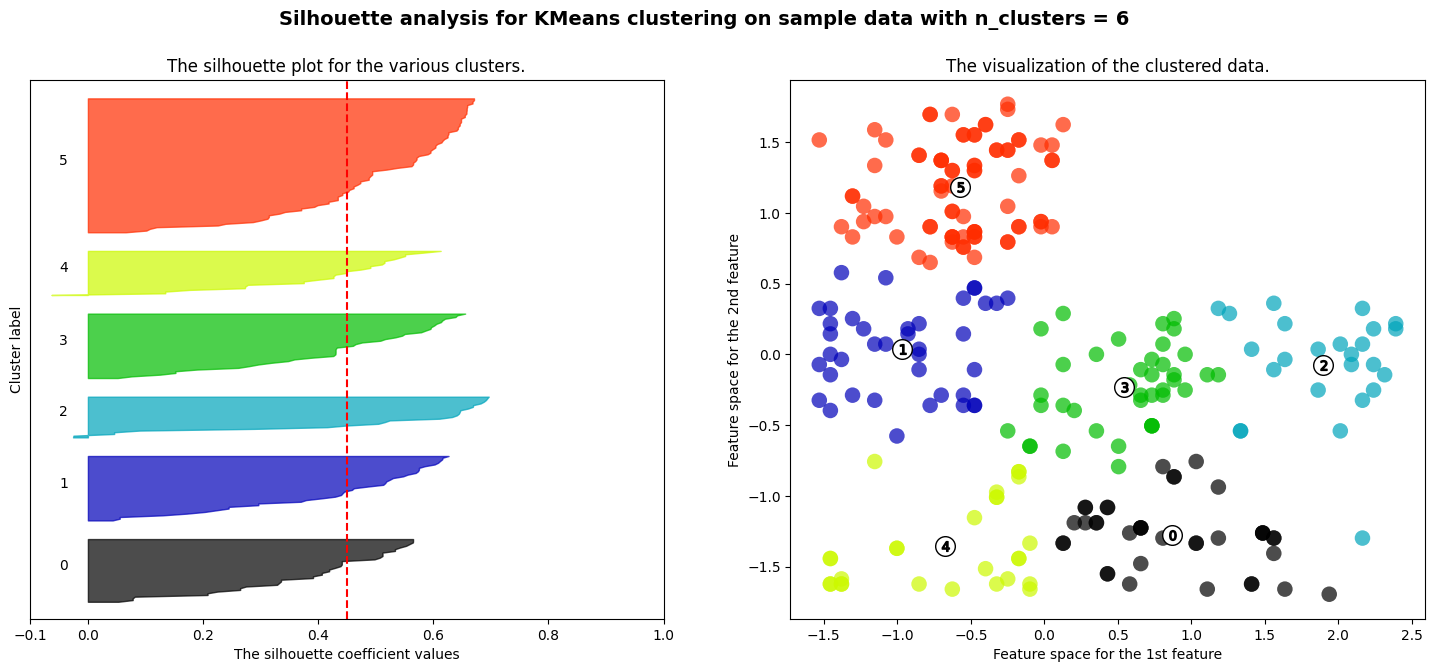

In [33]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, 
    #to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto")#, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_ score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[umur], X[skor], marker=".", s=500, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()